# Movie Recommendation Project DSC 550

This project will work on using the Movies Dataset from MovieLens which includes 45,000 movies all before July of 2017. There are a total of 24 features accompanied by each movie listing in the dataset containing features like budget, keywords/genres, votes, production companies and languages.

In [1]:
#Loading our data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

movie_df = pd.read_csv('data/movies_metadata.csv', low_memory=False)

In [2]:
#Getting a look at our data

movie_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
movie_df.shape

(45466, 24)

In [4]:
movie_df.info

<bound method DataFrame.info of        adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                           

5.618207215133889


C:\Users\domin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vote_average', ylabel='Density'>

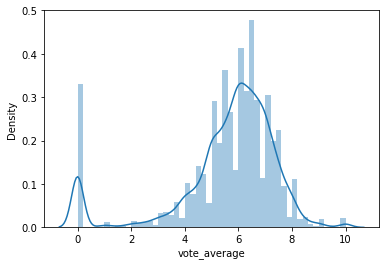

In [5]:
#data exploration


#Vote Average

c = movie_df['vote_average'].mean()

print(movie_df['vote_average'].mean())

sns.distplot(movie_df['vote_average'])


There are many movies in the dataset which average about a 5.6 rating from users, we may way to facttor this down a little bit to only include movies which have had a significant amount of votes compared to the rest

In [6]:
#Getting the top 20 percent of movies with the most votes. 

m = movie_df['vote_count'].quantile(.80)
print(movie_df['vote_count'].quantile(.80))

50.0


In [7]:
m_movies = movie_df.copy().loc[movie_df['vote_count'] >= m]
m_movies.shape

(9151, 24)

We now only have 9151 movies in our dataset which are all the movies with greater than 50 votes. Now lets create a dataframe that weighs both of these categories

In [8]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, m=m, c=c):
    v = x['vote_count']
    r = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * r) + (m/(m+v) * c)

In [9]:
#Creating a 'feature' score and calculating the new 'weighted rating'
#The more votes with a higher rating the higher the feature score for a movie

m_movies['score'] = m_movies.apply(weighted_rating, axis=1)

In [10]:
#Sort movies based on score calculated above
m_movies = m_movies.sort_values('score', ascending=False)

#Print the top 20 movies
m_movies[['title', 'vote_count', 'vote_average', 'score']].head(20)

,title,vote_count,vote_average,score
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.855148
314,The Shawshank Redemption,8358.0,8.5,8.482863
834,The Godfather,6024.0,8.5,8.476278
40251,Your Name.,1030.0,8.5,8.366584
12481,The Dark Knight,12269.0,8.3,8.289115
2843,Fight Club,9678.0,8.3,8.286216
292,Pulp Fiction,8670.0,8.3,8.284623
522,Schindler's List,4436.0,8.3,8.270109
23673,Whiplash,4376.0,8.3,8.269704
5481,Spirited Away,3968.0,8.3,8.266628


We will be creating a Content Based Recommendation system which will give recommendations based on an input of an item. For example if we want to get recommendations for the movie: 'Lord of the Rings: The Fellowship of the Ring' we would expect an output of other 'Lord of the Ring' movies. In this case we will want to use NLP in ordre to create good recommendations as we will be basing our recommendations on similar content. For this, we will be using the other data which came with the kaggle dataset. 

In [11]:
credits = pd.read_csv('data/credits.csv')
keywords = pd.read_csv('data/keywords.csv')

In [12]:
movies = movie_df.drop([19730,29503,35587])

In [13]:
# Convert IDs to int. Required for merging
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
movies['id'] = movies['id'].astype('int')

In [14]:
# Merge keywords and credits into your main metadata dataframe
movies = movies.merge(credits, on='id')
movies = movies.merge(keywords, on='id')

In [15]:
#Basing our content recommendation off of the cast, crew, keywords and genre of a movie
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(literal_eval)

In [16]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [17]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Returning entire list if less than 3 listed
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [18]:
# Define new director, cast, genres and keywords features that are in a suitable form.
movies['director'] = movies['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(get_list)

In [19]:
movies[['title', 'cast', 'director', 'keywords', 'genres']].head()

,title,cast,director,keywords,genres
0,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy]","[Animation, Comedy, Family]"
1,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]"
2,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch,"[fishing, best friend, duringcreditsstinger]","[Romance, Comedy]"
3,Waiting to Exhale,"[Whitney Houston, Angela Bassett, Loretta Devine]",Forest Whitaker,"[based on novel, interracial relationship, sin...","[Comedy, Drama, Romance]"
4,Father of the Bride Part II,"[Steve Martin, Diane Keaton, Martin Short]",Charles Shyer,"[baby, midlife crisis, confidence]",[Comedy]


In [20]:
#Normalizing our data
# Stripping spaces and converting all strings to lwoercase
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [21]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    movies[feature] = movies[feature].apply(clean_data)

In [22]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

In [23]:
# Create a new soup feature
movies['soup'] = movies.apply(create_soup, axis=1)

In [24]:
movies[['soup']].head()

,soup
0,jealousy toy boy tomhanks timallen donrickles ...
1,boardgame disappearance basedonchildren'sbook ...
2,fishing bestfriend duringcreditsstinger walter...
3,basedonnovel interracialrelationship singlemot...
4,baby midlifecrisis confidence stevemartin dian...


In [25]:
#Starting on our recommendation
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
matrix = count.fit_transform(movies['soup'])

In [26]:
matrix.shape

(46628, 73881)

In [27]:
#For recommendation we will be using Cosine Similarity matrix in order to create our recommendations. 
from sklearn.metrics.pairwise import cosine_similarity

In [28]:
# Reset index of your main DataFrame and construct reverse mapping as before
movies= movies.reset_index()
indices = pd.Series(movies.index, index=movies['title'])

In [29]:
cosine_sim = cosine_similarity(matrix, matrix)

In [30]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies['title'].iloc[movie_indices]
    
    

In [31]:
get_recommendations('The Lord of the Rings: The Return of the King', cosine_sim)

7069         The Lord of the Rings: The Return of the King
4904     The Lord of the Rings: The Fellowship of the Ring
22257                  The Hobbit: The Desolation of Smaug
20174                    The Hobbit: An Unexpected Journey
25591            The Hobbit: The Battle of the Five Armies
14315                                  The Hunt for Gollum
26772                                             Warcraft
43520                            SAGA: Curse of the Shadow
22889                                   Behind Enemy Lines
30751                                The Last Witch Hunter
Name: title, dtype: object

In [32]:
get_recommendations('Troy', cosine_sim)

43825        The Silent Mountain
262          Legends of the Fall
24568                       Fury
15704                 Play Dirty
20938               The Mountain
29881                     Canopy
32406                    Zaytoun
44356        Hornblower: Loyalty
3010     A River Runs Through It
22679                River Queen
Name: title, dtype: object

In [33]:
get_recommendations('Shrek', cosine_sim)

7793                                  Shrek 2
13260                         Shrek the Halls
15543                     Shrek Forever After
16276                        Scared Shrekless
11934                         Shrek the Third
33390                     The Mole at the Sea
26934                  Lotte from Gadgetville
3659     The Adventures of Rocky & Bullwinkle
12470                              Fallen Art
17254                       Idiots and Angels
Name: title, dtype: object

In [34]:
get_recommendations('Pulp Fiction', cosine_sim)

451                  Fresh
22726     Reasonable Doubt
12440              Cleaner
7340     Kill Bill: Vol. 2
791         A Time to Kill
1667          Jackie Brown
6515              S.W.A.T.
10901          Freedomland
13053     Lakeview Terrace
28345    The Hateful Eight
Name: title, dtype: object

In [35]:
get_recommendations('Reservoir Dogs', cosine_sim)

12553                        Funny Games
31587                          Copkiller
18940                          Last Exit
20587                      The Liability
34488                               Rege
30358                      The Ministers
41799                       The Big I Am
17598                     Killing Auntie
34303                     The Absent One
39077    The Twin Girls of Sunset Street
Name: title, dtype: object

Part 2: User Based- Movie Recommendation

To make recommendations based on user rating, we would need to extract users and the ratings which they have made. Using users for recommendations should take into account tastes of different users.

In [36]:
user = pd.read_csv('data/ratings_small.csv')

In [37]:
#Creating dataset for 
user.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [38]:
#Filtering so that users must have rated 50+ movies to be considered for this model
user_filtered = user.groupby('userId').filter(lambda x: len(x) > 50)

user_filtered.head()

,userId,movieId,rating,timestamp
20,2,10,4.0,835355493
21,2,17,5.0,835355681
22,2,39,5.0,835355604
23,2,47,4.0,835355552
24,2,50,4.0,835355586


In [39]:
movie_list_rating = user_filtered.movieId.unique().tolist()

In [40]:
movies = pd.read_csv('data/movies_metadata.csv', low_memory=False)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [41]:
#Cleaning
title = movies['title'].isna()

movies = movies.loc[title == False]

In [42]:
movies= movies.astype({'id':'int64'})

In [43]:
df = pd.merge(user_filtered, movies[['id', 'title']], left_on='movieId', right_on='id')
df.head()

,userId,movieId,rating,timestamp,id,title
0,2,17,5.0,835355681,17,The Dark
1,15,17,3.0,997939404,17,The Dark
2,18,17,4.0,856006886,17,The Dark
3,57,17,5.0,907763245,17,The Dark
4,67,17,4.0,854711772,17,The Dark


In [44]:
df.drop(['timestamp', 'id'], axis=1, inplace=True)

In [45]:
df = df.drop_duplicates(['userId','title'])

In [46]:
df_pivot = df.pivot(index='userId', columns='title', values='rating').fillna(0)

In [47]:
df_pivot = df_pivot.astype('int64')

In [48]:
def encode_ratings(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

df_pivot = df_pivot.applymap(encode_ratings)

In [49]:
df_pivot.head()

title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...And God Created Woman,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 Angry Men,...,Zodiac,Zombie Flesh Eaters,Zombie Holocaust,Zozo,eXistenZ,xXx,¡Three Amigos!,À nos amours,Ödipussi,Şaban Oğlu Şaban
userId,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df.title.nunique(), df.userId.nunique()

(2777, 421)

In [51]:
df_pivot = df_pivot.dropna(thresh = 10, axis = 1).fillna(0)

In [52]:
df_pivot

title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...And God Created Woman,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 Angry Men,...,Zodiac,Zombie Flesh Eaters,Zombie Holocaust,Zozo,eXistenZ,xXx,¡Three Amigos!,À nos amours,Ödipussi,Şaban Oğlu Şaban
userId,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
665,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
item_similarity = df_pivot.corr(method = "pearson")

In [54]:
def get_similar_movies(movie_name, user_rating):
    similar_score = item_similarity[movie_name]*(user_rating-2.5)
    similar_score = similar_score.sort_values(ascending = False)
    
    return similar_score

In [55]:
#Recommendations for a someone who gave Reservoir Dogs a 5

Reservoir_Dog_Fan = [("Reservoir Dogs", 5)]
    
similar_movies = pd.DataFrame()

for movie, rating in Reservoir_Dog_Fan:
    similar_movies = similar_movies.append(get_similar_movies(movie, rating), ignore_index = True)

similar_movies.head()
similar_movies.sum().sort_values(ascending = False)



Reservoir Dogs        2.500000
Syriana               1.400512
Batman Returns        1.373586
Wag the Dog           1.356017
Psycho                1.353775
                        ...   
A Night in Heaven    -0.191392
Hour of the Gun      -0.197010
Changing Lanes       -0.199066
Wuthering Heights    -0.242972
The Halliday Brand   -0.285950
Length: 2777, dtype: float64

In [56]:
#Recommendations for a someone who gave Batman Returns a 5

Batman_Returns_Fan = [("Batman Returns", 5)]
    
similar_movies = pd.DataFrame()

for movie, rating in Batman_Returns_Fan:
    similar_movies = similar_movies.append(get_similar_movies(movie, rating), ignore_index = True)

similar_movies.head()
similar_movies.sum().sort_values(ascending = False)

Batman Returns           2.500000
To Kill a Mockingbird    1.450934
Reservoir Dogs           1.373586
Silent Hill              1.340696
Bang, Boom, Bang         1.153568
                           ...   
The Hucksters           -0.247388
The Demolitionist       -0.247388
Twice Upon a Time       -0.286350
The Reaping             -0.304089
Lassie Come Home        -0.320927
Length: 2777, dtype: float64

In [57]:
#Recommendations for a someone who gave Shrek a 5

Shrek_Fan = [("Shrek", 5)]
    
similar_movies = pd.DataFrame()

for movie, rating in Shrek_Fan:
    similar_movies = similar_movies.append(get_similar_movies(movie, rating), ignore_index = True)

similar_movies.head()
similar_movies.sum().sort_values(ascending = False)

Shrek                       2.500000
Manta - Der Film            1.575468
The Dirty Dozen             1.244033
Casanova '70                1.012086
Vampyr                      1.012086
                              ...   
Batman Returns             -0.142146
Rope                       -0.147109
Once Were Warriors         -0.163530
Solaris                    -0.194145
The Million Dollar Hotel   -0.197930
Length: 2777, dtype: float64